In [28]:
from pyimzml.ImzMLParser import ImzMLParser
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
import pandas as pd


# Path to imzML file
imzml_path = r"../../../npc-rnd/live/RND_Projects/DESI/out/2025_03_28_VSK_LC22_section5_NEG_25um_250_G3_A_Analyte 1_1/2025_03_28_VSK_LC22_section5_NEG_25um_250_G3_A_Analyte 1_1_ROI_TIC_log.imzML/2025_03_28_VSK_LC22_section5_NEG_25um_250_G3_A_Analyte 1_1_ROI_TIC_log.imzML"
parser = ImzMLParser(imzml_path)
print("Number of spectra (pixels):", len(parser.coordinates))





Number of spectra (pixels): 17271


In [29]:
# extracting the first mass spectrum (index 0). This returns a list of mz values and corresponding list of intensities
mz, intensity = parser.getspectrum(0)
# getting the spatial coordinates for the current spectrum
x, y, z = parser.coordinates[0]

print(f"Coordinate: ({x},{y},{z})")
print("First 10 m/z:", mz[:10])
print("First 10 intensities:", intensity[:10])
print("Min intensity:", np.min(intensity))
print("Max intensity:", np.max(intensity))
print("Number of mz values:", len(mz))



Coordinate: (200,50,1)
First 10 m/z: [100.00455011 100.00758362 100.00975048 100.0126758  100.01668474
 100.02346187 100.02944005 100.03395577 100.03724265 100.04072193]
First 10 intensities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Min intensity: 0.0
Max intensity: 3885.293
Number of mz values: 135194


In [30]:
# Getting all the spatial coordinates to check the positional ranges
# x ranges from 200 - 300 = 100
# y ranges from  50 - 220 = 170
# the data covers 100 X 170 regions
xs = [coord[0] for coord in parser.coordinates]
ys = [coord[1] for coord in parser.coordinates]
print("X range:", min(xs), "to", max(xs))
print("Y range:", min(ys), "to", max(ys))


X range: 200 to 300
Y range: 50 to 220


In [31]:
# Each pixel (spectrum) has 135194 mz values and corresponding intensity values
len(mz), len(intensity)

(135194, 135194)

In [32]:
intensity.mean(), intensity.max(), intensity.min()
# Total ion count for this spectrum


(1.0, 3885.293, 0.0)

In [33]:
tic = intensity.sum()
print("TIC:", tic)


TIC: 135194.0


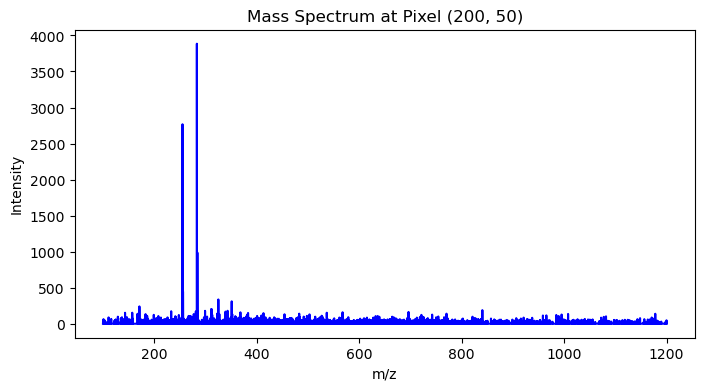

In [5]:
# Plot
plt.figure(figsize=(8, 4))
plt.plot(mz, intensity, color='blue')
plt.title(f"Mass Spectrum at Pixel ({x}, {y})")
plt.xlabel("m/z")
plt.ylabel("Intensity")
# plt.xlim(50, 1500)  
plt.show()


In [6]:
# Building a TIC (total ion count) image by summing all the intensities for every coordinate
coords = np.array(parser.coordinates)  # (x, y, z)
x_vals = np.unique(coords[:, 0])
y_vals = np.unique(coords[:, 1])
coords

# Creating an empty image (y, x)
tic_image = np.zeros((len(y_vals), len(x_vals)))

# calculating total ion count (TIC) per pixel
for i, (x, y, z) in enumerate(coords):
    mzs, intensities = parser.getspectrum(i)
    tic = np.sum(intensities)
    xi = np.where(x_vals == x)[0][0]
    yi = np.where(y_vals == y)[0][0]
    tic_image[yi, xi] = tic
#     print("Min intensity:", np.min(intensities))
#     print("Max intensity:", np.max(intensities))
#     print("Sum intensities:", tic)



In [7]:
print("m/z:", mzs), x_vals.max(), y_vals.max()



m/z: [ 100.00455011  100.00758362  100.00975048 ... 1199.90489783 1199.92059389
 1199.95802536]


(None, 300, 220)

In [8]:
print("dtype:", tic_image.dtype)
print("min:", tic_image.min())
print("max:", tic_image.max())
print("mean:", tic_image.mean())
print("sum:", tic_image.sum())


dtype: float64
min: 135193.96875
max: 135194.03125
mean: 135193.99995205112
sum: 2334935573.171875


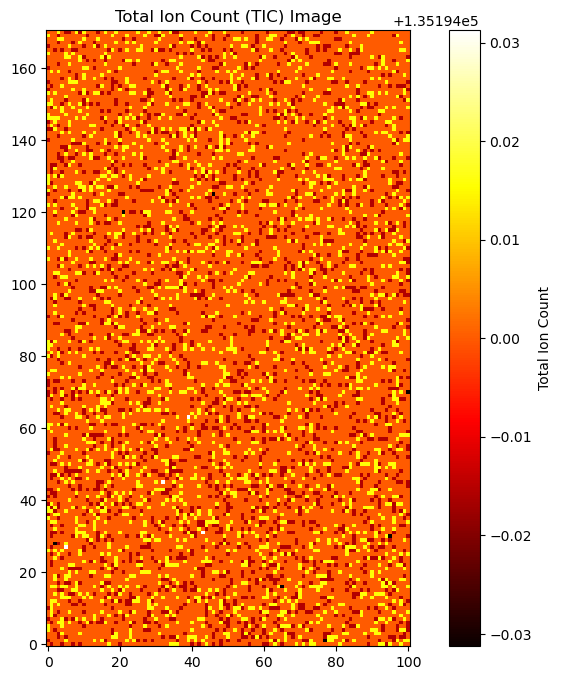

In [9]:
# display the image
plt.figure(figsize=(10, 8))
plt.imshow(tic_image, cmap='hot', origin='lower')
plt.title("Total Ion Count (TIC) Image")
plt.axis('on')
plt.colorbar(label='Total Ion Count')
plt.show()


In [10]:
x_vals


array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300])

In [11]:
y_vals


array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220])

In [12]:
tic_image

array([[135194.      , 135193.984375, 135194.      , ..., 135194.015625,
        135194.      , 135194.      ],
       [135193.984375, 135194.      , 135194.      , ..., 135194.      ,
        135194.015625, 135194.015625],
       [135194.      , 135194.      , 135194.      , ..., 135193.984375,
        135193.984375, 135194.      ],
       ...,
       [135194.      , 135194.      , 135194.      , ..., 135194.      ,
        135194.      , 135194.      ],
       [135194.015625, 135194.      , 135194.      , ..., 135194.      ,
        135194.      , 135194.      ],
       [135194.      , 135194.      , 135194.      , ..., 135194.      ,
        135194.      , 135194.      ]])

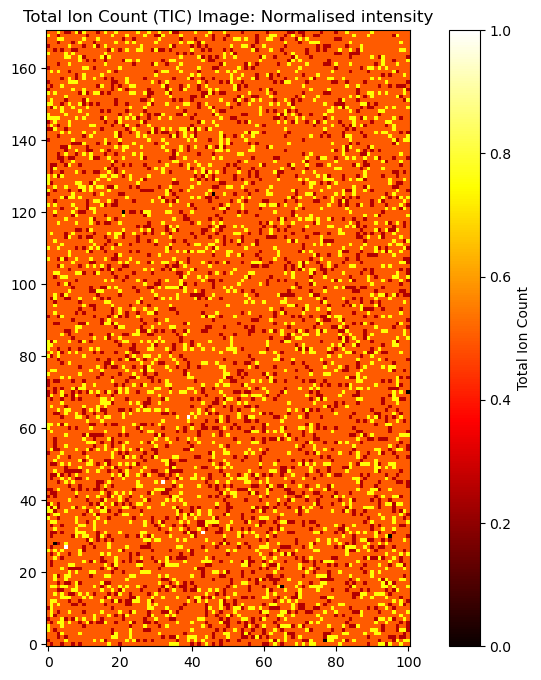

In [13]:
# Scale values 0–1 for visualization
scaled_img = (tic_image - tic_image.min()) / (tic_image.max() - tic_image.min())
plt.figure(figsize=(10, 8))
plt.imshow(scaled_img, cmap='hot', origin='lower')
plt.title("Total Ion Count (TIC) Image: Normalised intensity")
plt.colorbar(label='Total Ion Count')
plt.axis('on')
plt.show()




In [14]:
# Get m/z axis (same for all)
mz_axis, _ = parser.getspectrum(0)
mz_axis = np.array(mz_axis)

rows = []
for i, (x, y, z) in enumerate(parser.coordinates[:1000]):  # get the first 100 spectra
    _, intensities = parser.getspectrum(i)
    row = [x, y] + intensities.tolist()
    rows.append(row)

# columns = ["x", "y"] + [f"mz_{m:.4f}" for m in mz_axis]
columns = ["x", "y"] + [f"mz_{m}" for m in mz_axis]

df = pd.DataFrame(rows, columns=columns)

df

,x,y,mz_100.0045501077393,mz_100.00758362275333,mz_100.00975047532805,mz_100.01267580489679,mz_100.01668473634754,mz_100.02346186714735,mz_100.02944004805256,mz_100.03395577216801,...,mz_1199.74992635499,mz_1199.7728196042478,mz_1199.7966223519475,mz_1199.8119884003431,mz_1199.8349296766196,mz_1199.8586063514872,mz_1199.881673798113,mz_1199.9048978273534,mz_1199.9205938877158,mz_1199.9580253592148
0,200,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.479721,47.479721,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,201,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,202,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,203,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,204,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,286,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
996,287,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,22.816898,22.816898,0.0,0.0,31.306784,0.0,0.0,0.0,0.0
997,288,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
998,289,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
def mz_plot(target_mz, tolerance):
    # --- Get coordinate ranges ---
    coords = np.array(parser.coordinates)
    x_vals = np.unique(coords[:, 0])
    y_vals = np.unique(coords[:, 1])
    ion_image = np.zeros((len(y_vals), len(x_vals)))

    for i, (x, y, z) in enumerate(parser.coordinates):
        mzs, intensities = parser.getspectrum(i)
        mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
        if np.any(mask):
            xi = np.where(x_vals == x)[0][0]
            yi = np.where(y_vals == y)[0][0]
            ion_image[yi, xi] = np.sum(intensities[mask])
           
    # Plot with adjusted contrast
    # vmax = np.percentile(ion_image, 99)
    # plt.imshow(ion_image, cmap="jet", origin="lower", vmax=vmax)
    # ion_image = ion_image / ion_image.max() 
    plt.figure(figsize=(10, 8))
    plt.imshow(ion_image, cmap='hot', origin='upper')
    plt.title(f"Ion intensity: m/z {target_mz} ± {tolerance}")
    plt.colorbar()
    # plt.colorbar(label=f"Ion intensity at m/z {target_mz} ± {tolerance}")
    plt.show()


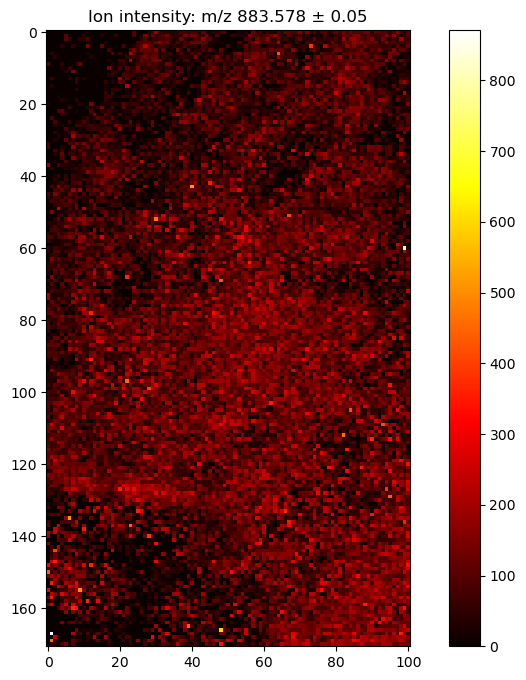

In [16]:
mz_plot(883.578, 0.05 )

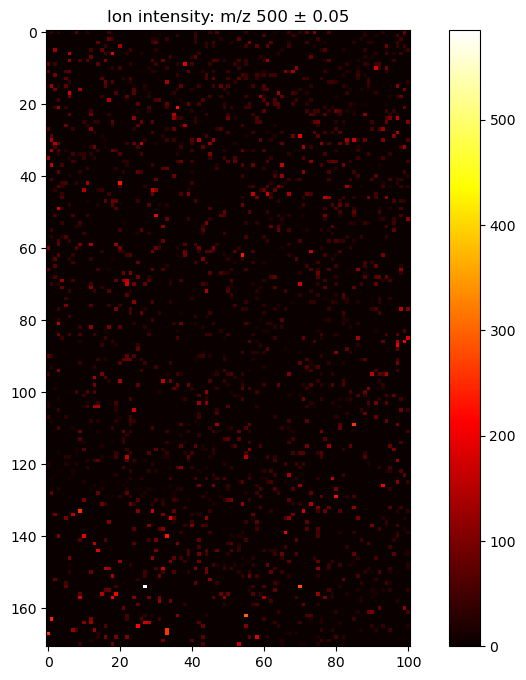

In [17]:
mz_plot(500, 0.05 )

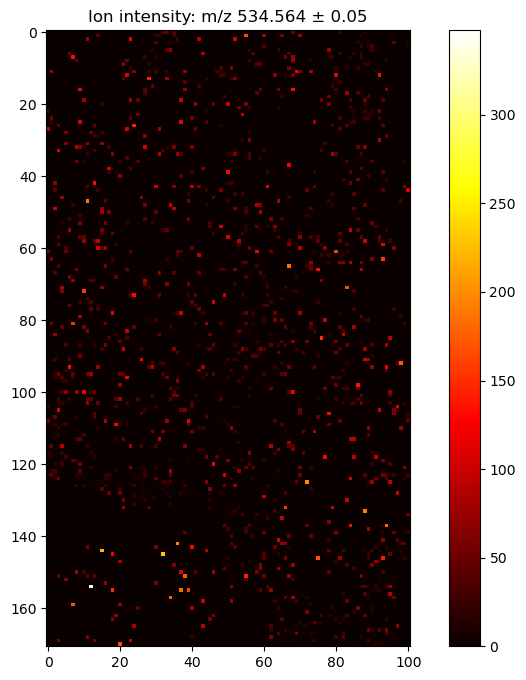

In [18]:
mz_plot(534.564, 0.05 )

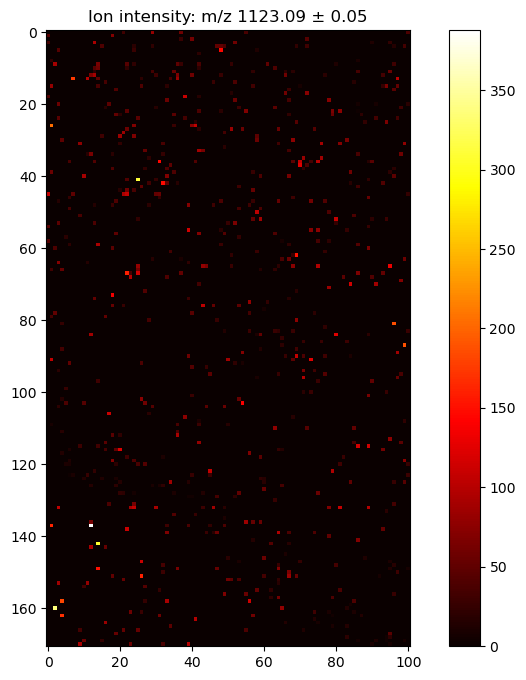

In [19]:
mz_plot(1123.09, 0.05 )

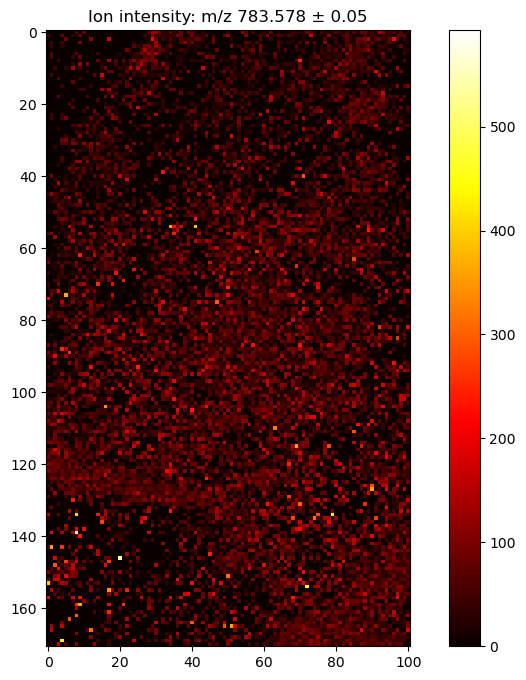

In [20]:
mz_plot(783.578, 0.05 )

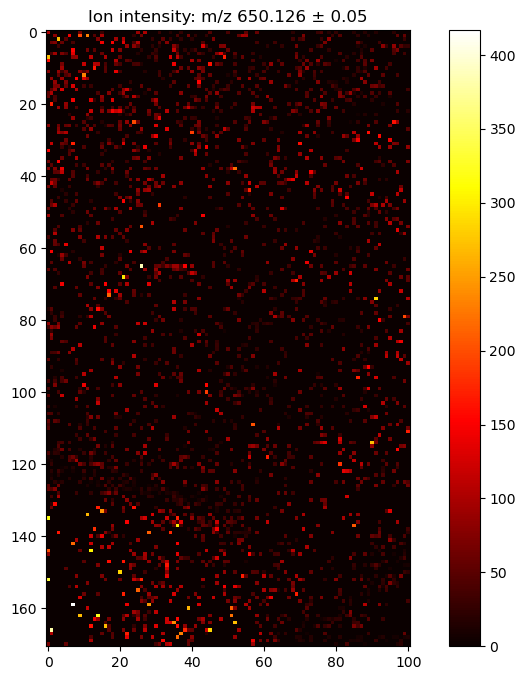

In [21]:
mz_plot(650.126, 0.05 )

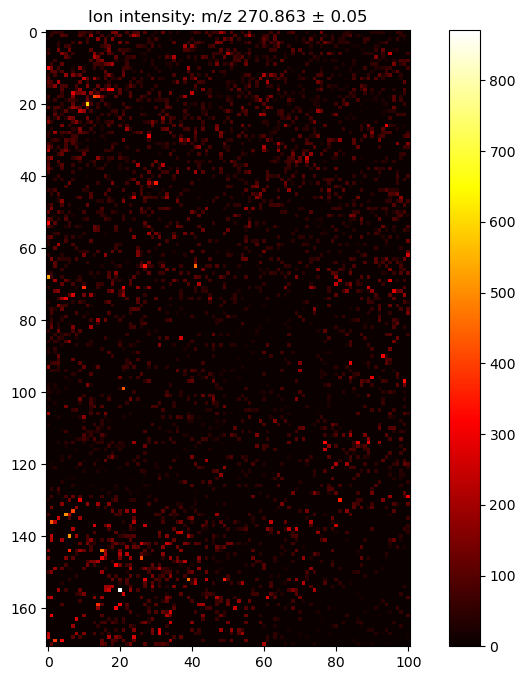

In [22]:
mz_plot(270.863, 0.05 )

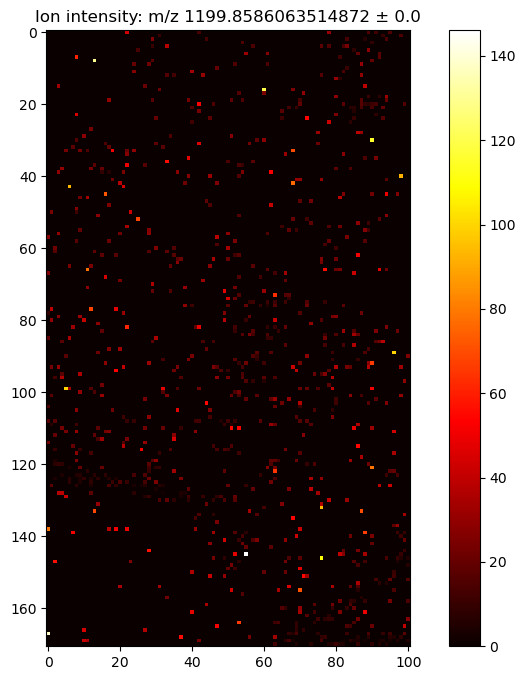

In [23]:
mz_plot(1199.8586063514872, 0.0 )